<a href="https://colab.research.google.com/github/malkang92/skku_ML/blob/main/7%EC%A3%BC%EC%B0%A8_KNN_%EC%9D%B4%EA%B0%95%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
# 코랩 탭의 새로운 파일구조 내에서 위에서 복제한 실습 자료가 있는 폴더로 이동.
%cd /content/drive/MyDrive/SKKU폴더/25_하반기_06.기계학습특론/exercise

# k-최근접 이웃 (k-Nearest Neighbor) (실습)

### [1] 실습 진행 관련 설명
k-최근접 이웃에 대한 실습을 진행하고자 한다. 실습은 크게 두가지로 구성되어 있다.

- sklearn 라이브러리를 이용한 방법
- 직접 함수를 구현하는 방법

처음에는 sklearn 라이브러리를 이용한 방법을 실습하고 그 이후에 직접 함수를 구현하여 실습을 진행한다.

## [2] 코드 구현의 흐름


- (1) (데이터 측면) 데이터 불러오기

- (2) (데이터 측면) 데이터에서 사용할 성분 추출하기

- (3) (모델 측면) sklearn 라이브러리를 이용하여 k-최근접이웃 불러오기. 또는 직접 함수 구현하기 (K-최근접이웃 모델 정의).

- (4) (학습 과정) sklearn 라이브러리를 이용하여 알고리즘 수행하기. 또는 직접 구현하기 (k의 값에 따라).

- (5) (성능 평가) 테스트 데이터를 이용하여 결과에 대한 성능 평가하기 및 최적의 k 찾기. (Accuracy)

## (공통) 데이터 불러오기




In [ ]:
import pandas as pd
import matplotlib.pyplot as pl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# (1) (데이터 측면)데이터 불러오기
# train 데이터용 파일과 test 데이터용 파일이 분리되어 있다.
# 각각 데이터를 불러온다.
train = pd.read_csv('/content/drive/MyDrive/SKKU폴더/25_하반기_06.기계학습특론/exercise/basketball_train.csv')
test = pd.read_csv('/content/drive/MyDrive/SKKU폴더/25_하반기_06.기계학습특론/exercise/basketball_test.csv')
print(train)

#아래 출력 결과를 통해 이번 실습에서 사용할 데이터를 확인해보자.
#전체 데이터의 개수는 몇개인지?

    Unnamed: 0            Player Pos   3P  TRB  BLK
0           26   Wayne Ellington  SG  2.4  2.1  0.1
1           86      Nik Stauskas  SG  1.7  2.8  0.4
2           60          Alex Len   C  0.0  6.6  1.3
3           45       Buddy Hield  SG  1.8  3.3  0.1
4           68       Jodie Meeks  SG  1.6  2.1  0.1
..         ...               ...  ..  ...  ...  ...
75          82        J.R. Smith  SG  2.3  2.8  0.3
76           5     Nicolas Batum  SG  1.8  6.2  0.4
77          40  Montrezl Harrell   C  0.0  3.8  0.7
78          22      Troy Daniels  SG  2.1  1.5  0.1
79          43       John Henson   C  0.0  5.1  1.3

[80 rows x 6 columns]


In [11]:
len(train)

80

In [7]:
train.head()

,Unnamed: 0,Player,Pos,3P,TRB,BLK
0,26,Wayne Ellington,SG,2.4,2.1,0.1
1,86,Nik Stauskas,SG,1.7,2.8,0.4
2,60,Alex Len,C,0.0,6.6,1.3
3,45,Buddy Hield,SG,1.8,3.3,0.1
4,68,Jodie Meeks,SG,1.6,2.1,0.1


In [ ]:
# (2) (데이터 측면)데이터에서 사용할 성분 추출하기
# 오늘 실습은 SG(슈팅가드)포지션과 C(센터)포지션을 분류하는 실습을 진행한다
# Pos : 포지션, 3P : 3점슛, TRB : 리바운드, BLK : 블락
# 농구에서 두 포지션의 가장 큰 차이는 3점슛의 여부와 블락 여부이다.
# 배경지식 : 일반적으로 SG포지션은 3P수치가 높고, C포지션은 BLK 수치가 높다.
x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

In [10]:
x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

In [ ]:
import matplotlib.pyplot as plt

# (2-1) 학습데이터 시각화
def plot_knn(feature, label, test_feature):
    plt.title('kNN')
    plt.plot(feature[label=="SG"]["3P"], feature[label=="SG"]["BLK"],'o', c="blue", label="SG") #학습데이터 중 SG 데이터를 파란색으로 시각화
    plt.plot(feature[label=="C"]["3P"], feature[label=="C"]["BLK"],'o', c="red", label="C")     #학습데이터 중 C 데이터를 빨간색으로 시각화
    plt.plot(test_feature[:]["3P"], test_feature[:]["BLK"],'o', c="gray", label="test_data")    #테스트 데이터는 회색으로 시각화
    plt.tight_layout()
    plt.xlabel("3P")   # x축 표시
    plt.ylabel("BLK")  # y축 표시
    plt.legend()
    plt.show()
plot_knn(x_train, y_train.values.ravel(), x_test)

In [15]:
print(y_train.values.ravel())
print(y_train.values.ravel().shape)

['SG' 'SG' 'C' 'SG' 'SG' 'C' 'C' 'C' 'C' 'C' 'SG' 'C' 'SG' 'C' 'SG' 'C'
 'SG' 'SG' 'C' 'C' 'C' 'SG' 'C' 'C' 'SG' 'SG' 'SG' 'C' 'C' 'SG' 'SG' 'C'
 'SG' 'C' 'SG' 'C' 'SG' 'SG' 'C' 'C' 'C' 'C' 'SG' 'C' 'SG' 'C' 'C' 'C'
 'SG' 'C' 'C' 'C' 'C' 'C' 'C' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'SG' 'C'
 'SG' 'SG' 'C' 'C' 'SG' 'SG' 'C' 'C' 'C' 'C' 'C' 'SG' 'SG' 'C' 'SG' 'C']
(80,)


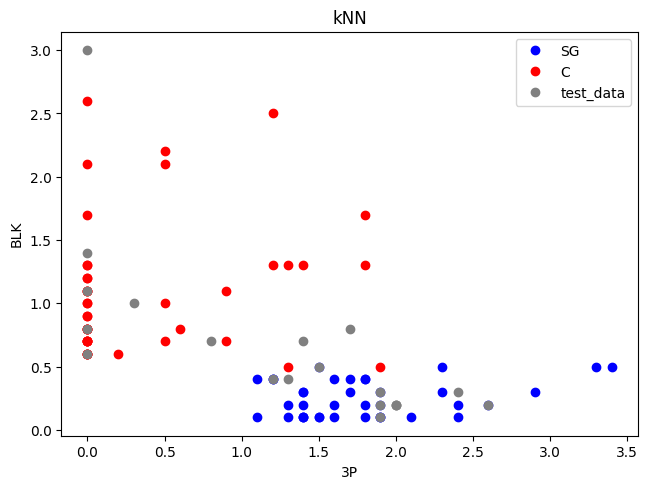

In [16]:
#feature = x_train
#label = y_train.values.ravel()
#test_feature = x_test

def plot_knn(feature, label, test_feature):
  plt.title('kNN')
  plt.plot(feature[label=="SG"]["3P"], feature[label=="SG"]["BLK"], 'o', c="blue", label="SG")
  plt.plot(feature[label=="C"]["3P"], feature[label=="C"]["BLK"], 'o', c="red", label="C")
  plt.plot(test_feature[:]["3P"], test_feature[:]["BLK"], 'o', c="gray", label="test_data")
  plt.tight_layout()
  plt.xlabel("3P")
  plt.ylabel("BLK")
  plt.legend()
  plt.show()

plot_knn(x_train, y_train.values.ravel(), x_test)

## (첫번째 실습) sklearn 라이브러리를 이용한 방법




In [ ]:
# k-최근접 이웃(k-nearest Neighbor)

# 라이브러리 불러오기 (Importing the libraries)
from sklearn.neighbors import KNeighborsClassifier #kNN알고리즘
from sklearn.metrics import accuracy_score         #정확도측정
import numpy as np


# (3) (모델 측면) sklearn 라이브러리를 이용하여 k-최근접이웃 불러오기 (k=1)
knn = KNeighborsClassifier(n_neighbors=1) #n_neighbors는 이론에서 배운 k를 의미한다.
knn.fit(x_train, y_train.values.ravel())  #values.ravel() -> 데이터에서 index 정보와 pos정보를 제외한 값(values)만을 추출한다.

# (4) (학습 과정) sklearn 라이브러리를 이용하여 알고리즘 수행하기.
y_pred_1 = knn.predict(x_test)
# (5) (성능 평가) 테스트 데이터를 이용하여 결과에 대한 성능 평가하기.
accuracy_score(y_test, y_pred_1)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train.values.ravel())

y_pred_1 = knn.predict(x_test)

accuracy_score(y_test, y_pred_1)

0.9

In [ ]:
# (5-2) (성능 평가) 최적의 k 찾기
max_val = 0
max_k = 0
for i in range(1,10,2): # 1부터 10까지 수를 +2씩 증가시키며(1,3,5,7,9)
    knn = KNeighborsClassifier(n_neighbors=i) # k의 값에 따른 결과값을 확인한다
    knn.fit(x_train, y_train.values.ravel())
    y_pred = knn.predict(x_test)
    if max_val < accuracy_score(y_test, y_pred): # 가장 높은 정확도를 가질 때의 k 값을 저장해준다.
        max_val = accuracy_score(y_test, y_pred)
        max_k = i
print(max_k)
print(max_val)

In [41]:
max_val = 0
max_k = 0

for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train.values.ravel())
  y_pred = knn.predict(x_test)
  print("i = ", i, accuracy_score(y_test, y_pred))
  if max_val < accuracy_score(y_test, y_pred):
    max_val = accuracy_score(y_test, y_pred)
    max_k = i

knn = KNeighborsClassifier(n_neighbors=max_k)
knn.fit(x_train, y_train.values.ravel())
y_pred_max_k = knn.predict(x_test)

print(max_k)
print(max_val)
print(y_pred_max_k)
print(y_pred_1)

i =  1 0.8
i =  2 0.75
i =  3 0.9
i =  4 0.9
i =  5 0.9
i =  6 0.9
i =  7 0.9
i =  8 0.9
i =  9 0.9
3
0.9
['C' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'SG' 'C' 'C' 'SG' 'C' 'SG' 'SG' 'SG'
 'SG' 'SG' 'C' 'C' 'SG']
['C' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'SG' 'C' 'C' 'SG' 'C' 'SG' 'SG' 'SG'
 'SG' 'SG' 'C' 'C' 'SG']


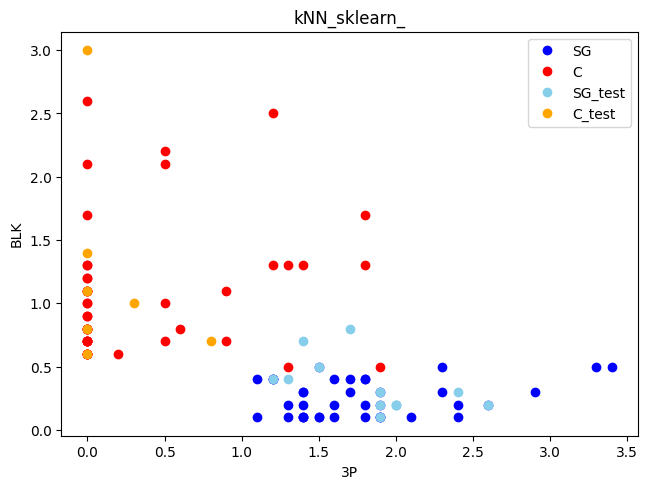

In [38]:
# (5-3) (결과 시각화) 테스트 데이터 분류 결과 시각화
def plot_knn_test(feature, label, test_feature, test_label):
    plt.title('kNN_sklearn_')
    plt.plot(feature[label=="SG"]["3P"], feature[label=="SG"]["BLK"],'o', c="blue", label="SG")#학습데이터 중 SG 데이터를 파란색으로 시각화
    plt.plot(feature[label=="C"]["3P"], feature[label=="C"]["BLK"],'o', c="red", label="C")#학습데이터 중 C 데이터를 파란색으로 시각화
    plt.plot(test_feature[test_label=="SG"]["3P"], test_feature[test_label=="SG"]["BLK"],'o', c="skyblue", label="SG_test") #테스트데이터 중 SG 데이터를 하늘색으로 시각화
    plt.plot(test_feature[test_label=="C"]["3P"], test_feature[test_label=="C"]["BLK"],'o', c="orange", label="C_test")#테스트데이터 중 C 데이터를 오랜지색으로 시각화
    plt.tight_layout()
    plt.xlabel("3P") #x축 표시
    plt.ylabel("BLK")#y축 표시
    plt.legend()
    plt.show()
plot_knn_test(x_train, y_train.values.ravel(), x_test, y_pred_1)

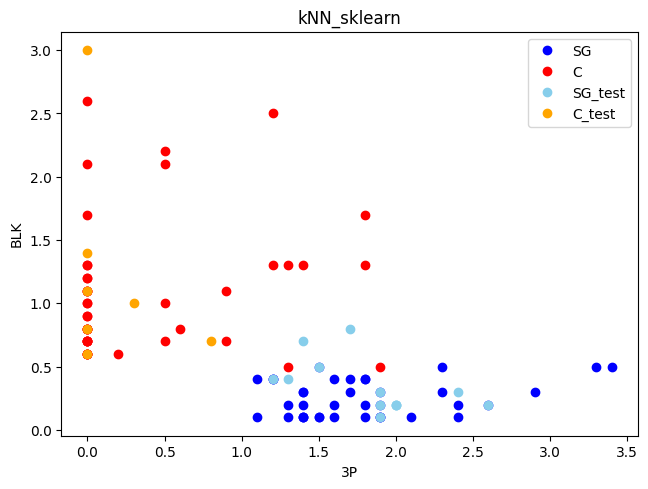

In [36]:
plot_knn_test(x_train, y_train.values.ravel(), x_test, y_pred_max_k)

## (두번째 실습) 직접 함수를 구현하는 방법

### 수학(math) 라이브러리
math 라이브러리는 수학적인 연산을 쉽게 사용할 수 있도록 도와준다.
그 중 대표적인 함수 pow, sqrt에 대해서 알아보도록 하자.

- pow( 밑, 지수 ) : power의 약자로, 특정 값의 지수 연산을 쉽게 할 수 있도록 도와준다.

- sqrt( 값 ) :
입력한 값의 제곱근을 구해준다.

### 리스트의 정렬
- list.sort() : list 내의 값을 오름차순으로 정렬해준다.

In [ ]:
import math # 수학관련 함수를 사용하기 위해 선언한 라이브러리

# (3) (모델 측면) k-최근접이웃 함수 직접 구현하기 (k=1)
# (3-1) 유클리드 거리 함수 선언하기
def distance(data1, data2): # data1과 data2 사이의 거리를 측정해준다. data의 모든 성분에 대해 연산을 진행한다.
  dist = 0
  for i in range(len(data1)):
    dist += math.pow(data1[i]-data2[i],2) # 각 성분의 값들의 차이를 제곱하여 더해준다.
  return math.sqrt(dist) # 모든 성분의 제곱의 합에 제곱근을 취해준다. 유클리디안 거리의 정의를 잘 생각해보자.

# (3-2) kNN 알고리즘 구현하기
def my_knn(x_train, y_train, x_test, k):
	result = []
	for i in range(len(x_test)): #x_test의 수만큼 진행한다. 테스트 데이터가 10개라면 10번 수행
		dist_list = [] # 이론에서 구현한 것처럼 모든 테스트 데이터에 대해서 학습 데이터와의 거리를 측정해야한다.
		for j in range(len(x_train)):
			dist_list.append([distance(x_train[j],x_test[i]), y_train[j]]) # (테스트데이터와 학습데이터의 거리, 학습데이터의 라벨)
		dist_list.sort() # 거리가 가까운 순서로 정렬
		#리스트에서 sort 함수를 실행 할 시에 내부에 있는 값들을 오름차순으로 정렬하여 인덱스를 부여한다.
		#ex. [3, 4, 5, 2, 1] -> [1, 2, 3, 4, 5]
		#데이터의 인덱스와 순서가 모두 변화함, 우리가 원하는 것은 테스트 데이터와 거리가 가장 가까운 k개의 데이터기 때문에,
		#거리순으로 정렬된 k 개의 데이터를 통해서 SG로 분류할지, C로 분류할지 결정하는것
		#ps. 다양한 정렬에 관한 실습은 앞서 배운 numpy 실습 내용을 참고할것
		cnt = 0
		for j in range(k): # k개의 데이터만큼 확인
			if dist_list[j][1]=="C": #해당 번째 데이터가 C이면 cnt +=1
				cnt += 1

		# C인 데이터의 수 cnt , SG인 데이터의 수 k - cnt
		if cnt>(k/2): # K개의 데이터 중 C가 더 많으면 C로, 아니면 SG로 분류
			result.append(["C"])
		else:
			result.append(["SG"])
	return result #테스트 데이터에 대해 모든 분류 결과가 반환된다.

# (4) (학습 과정) 직접 구현한 함수를 이용하여 알고리즘 수행하기.
y_pred_1 = my_knn(x_train.values, y_train.values, x_test.values, 1) # (학습데이터의 특징벡터, 학습데이터의 정답값, 테스트데이터의 특징벡터, K)

# (5) (성능 평가) 테스트 데이터를 이용하여 결과에 대한 성능 평가하기.
accuracy_score(y_test, y_pred_1)

In [43]:
import math

In [47]:
math.pow(2, 3) #2^3

8.0

In [50]:
import math

def distance(data1, data2):
  dist = 0
  for i in range(len(data1)):
    dist += math.pow(data1[i]-data2[i],2)
  return math.sqrt(dist)

In [56]:
len(x_test)

20

In [51]:
def my_knn(x_train, y_train, x_test, k):
  result = []
  for i in range(len(x_test)):
    dist_list = []
    for j in range(len(x_train)):
      dist_list.append([distance(x_train[j], x_test[i]), y_train[j]])
    dist_list.sort()

    cnt = 0
    for j in range(k):
      if dist_list[j][1]=="C":
        cnt += 1

    if cnt > (k/2):
      result.append(["C"])
    else:
      result.append(["SG"])
  return result

In [55]:
y_pred_1 = my_knn(x_train.values, y_train.values, x_test.values, 1)
print(y_pred_1)
print(len(y_pred_1))

[['C'], ['SG'], ['SG'], ['C'], ['SG'], ['SG'], ['SG'], ['C'], ['C'], ['C'], ['SG'], ['C'], ['SG'], ['SG'], ['C'], ['C'], ['SG'], ['C'], ['C'], ['SG']]
20


In [57]:
accuracy_score(y_test, y_pred_1)

0.75

In [ ]:
# (5-2) (성능 평가) 최적의 k 찾기
max_val = 0
max_k = 0
for i in range(1,10,2): #1부터 10까지 수를 +2씩 증가시키며(1,3,5,7,9)
    y_pred = my_knn(x_train.values, y_train.values, x_test.values, i) # k의 값에 따른 결과값을 확인한다
    if max_val < accuracy_score(y_test, y_pred):
        max_val = accuracy_score(y_test, y_pred)
        max_k = i
print(max_k)
print(max_val)

In [60]:
max_val = 0
max_k = 0

for i in range(1,10,2):
    y_pred = my_knn(x_train.values, y_train.values, x_test.values, i)
    if max_val < accuracy_score(y_test, y_pred):
        max_val = accuracy_score(y_test, y_pred)
        max_k = i
print(max_k)
print(max_val)

3
0.9


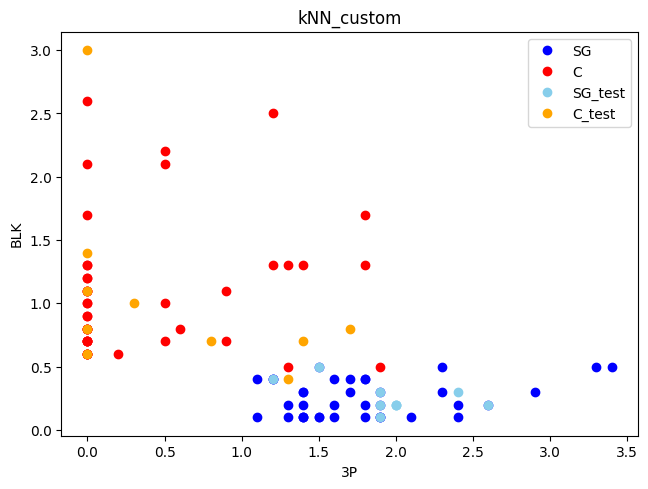

In [61]:
# (5-3) (결과 시각화) 테스트 데이터 분류 결과 시각화
def plot_knn_test(feature, label, test_feature, test_label):
    plt.title('kNN_custom')
    plt.plot(feature[label=="SG"]["3P"], feature[label=="SG"]["BLK"],'o', c="blue", label="SG")#학습데이터 중 SG 데이터를 파란색으로 시각화
    plt.plot(feature[label=="C"]["3P"], feature[label=="C"]["BLK"],'o', c="red", label="C")#학습데이터 중 C 데이터를 파란색으로 시각화
    plt.plot(test_feature[test_label=="SG"]["3P"], test_feature[test_label=="SG"]["BLK"],'o', c="skyblue", label="SG_test") #테스트데이터 중 SG 데이터를 하늘색으로 시각화
    plt.plot(test_feature[test_label=="C"]["3P"], test_feature[test_label=="C"]["BLK"],'o', c="orange", label="C_test")#테스트데이터 중 C 데이터를 오랜지색으로 시각화
    plt.tight_layout()
    plt.xlabel("3P") #x축 표시
    plt.ylabel("BLK")#y축 표시
    plt.legend()
    plt.show()
plot_knn_test(x_train, y_train.values.ravel(), x_test, np.array(y_pred_1).flatten())